In [1]:
#source: https://pypi.org/project/armagarch/

import armagarch as ag
import pandas_datareader as web
import matplotlib.pyplot as plt
import numpy as np


In [2]:

# load data from KennethFrench library
ff = web.DataReader('F-F_Research_Data_Factors_daily', 'famafrench')
ff = ff[0]



In [3]:
# define mean, vol and distribution
meanMdl = ag.ARMA(order = {'AR':1,'MA':0})
volMdl = ag.garch(order = {'p':1,'q':1})
distMdl = ag.normalDist()



In [4]:
# create a model
model = ag.empModel(ff['Mkt-RF'].to_frame(), meanMdl, volMdl, distMdl)
# fit model
model.fit()



C:\Users\vinic\.conda\envs\strange\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                                             ARMA-GARCH estimation results                                              
Dep Variable:                                      Mkt-RF    R-squared:                                           0.04
Mean Model:                                          ARMA    Adj. R-squared:                                      0.03
Vol Model:                                          GARCH    Log Likelihood:                                  -1528.92
Distribution:                                    Gaussian    AIC:                                              3067.84
Method:                                                ML    BIC:                                              3093.44
                                                             Num obs:                                             1237
Date:                                    Sun, May 02 2021    Df Residuals:                                        1233
Time:                                         

In [5]:
# get the conditional mean
Ey = model.Ey

# get conditional variance
ht = model.ht
cvol = np.sqrt(ht)

# get standardized residuals
stres = model.stres



In [6]:
# make a prediction of mean and variance over next 3 days.
pred = model.predict(nsteps = 3)

# pred is a list of two-arrays with first array being prediction of mean
# and second array being prediction of variance

In [7]:
pred

[array([0.04111883, 0.10518424, 0.09821445]),
 array([0.70442944, 0.73349989, 0.76191072])]

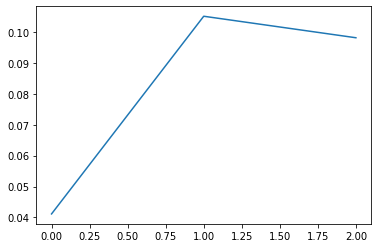

In [8]:
plt.plot(pred[0])

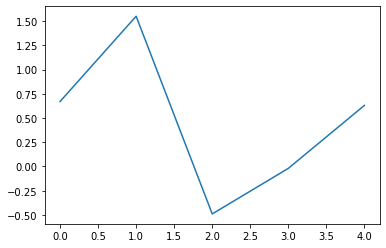

In [12]:
plt.plot(ff['Mkt-RF'].values[-5:])

AttributeError: 'numpy.ndarray' object has no attribute 'append'